# Assignment 1

In [4]:
from lib.roots import fixed_point
from lib.integrate import simpson, gaussian_quadrature
from matplotlib import pyplot as plt
from lib.plotter import plot_function, plot_data
from lib.ode import runge_kutta_4th_order
from lib.pde import HeatDiffusion, PoissonEquation
from lib.array import Array
import math

### 1. Solve $e^{-x} - x = 0$ using the fixed-point method, accurate upto 4 placed in decimal.

In [5]:
def problem_one(x):
    return math.exp(-x) - x


fixed_point(problem_one, 0.5, tol=1e-4, maxiter=1000)

problem_one has a root at 0.5671188642569858.


### 2. Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal

$$\int_0^1 \sqrt{1+x^4} dx$$

To calculate value within the required tolerance, we can calculate the fourth-order derivative of the given function and then use its maximal value. This will give us the
optimal number of intervals that we have to use.
The derivatives of given function are

$$f'(x) = \dfrac{2x^3}{\sqrt{1+x^4}}$$

$$f''(x) = \dfrac{2x^6 + 6x^2}{(1+x^4)^{3/2}}$$

$$f'''(x) = -\dfrac{12x(x^4 -1)}{(1+x^4)^{5/2}}$$

$$f''''(x) = \dfrac{60x^8 -168x^4 + 12}{(1+x^4)^{7/2}}$$

The maximum value of $f''''(x)$ can be found graphically as shown below:

Minimal value of y: 5.996221072276914e-05
Maximal value of y: 14.06093847425305


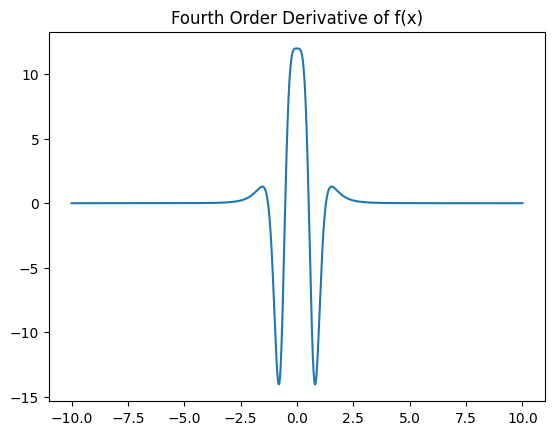

In [6]:
def fourth_order_derivative_problem_two(x):
    return (60*x**8 - 168*x**4 + 12) / (1+x**4)**3.5

plot_function(fourth_order_derivative_problem_two, (-10, 10), 10000, "Fourth Order Derivative of f(x)")



Now we can just use the value as below as we call the `simpson` function.

In [7]:
def problem_two(x):
    return math.sqrt(1 + x**4)


simpson(
    func=problem_two,
    bounds=(0, 1),
    tol=1e-8,
    maximum_value_of_error_func=14.06093847425305,
)

The value of the integral is 1.0894294132234008 with 52 intervals used.


The next step is to use an appropriate Gaussian quadrature to solve the same integral. 
This can be done by changing the limits of integration by using the fact that given function
is even and rewriting the problem as

$$\dfrac{1}{2} \int_{-1}^{1} \sqrt{1 + x^4} dx$$

In [8]:
gaussian_quadrature(problem_two, (-1, 1))


### 3. Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

$$\dfrac{dy}{dx} = \dfrac{5x^2-y}{e^{x+y}}$$

### with $y(0) = 1$.

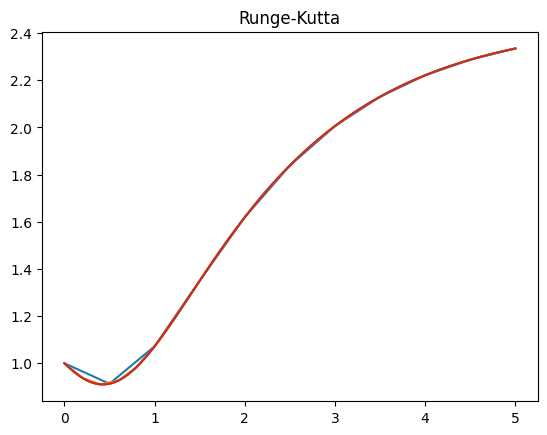

In [9]:
def problem_three(t, y):
    return (5 * t**2 - y) / (math.exp(t + y))

step_sizes = [0.5, 0.2, 0.05, 0.01]
all_t = []
all_y = []
for step_size in step_sizes:
    t, y = runge_kutta_4th_order(func=problem_three, t0=0, y0=1.0, interval=(0, 5), step_size=step_size)
    all_t.append(t)
    all_y.append(y)

for t, y in zip(all_t, all_y):
    plot_data(t, y, title="Runge-Kutta")

plt.show()

### 4. Solve the heat equation $u_t = 4u_xx$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions0

$$u(0, t) = 0 = u(8, t)$$
### and
$$x(x, 0) = 4x - \dfrac{x^2}{2}$$

Time      Space     Temperature
0.00      0.00      0.00e+00  
0.00      0.32      1.23e+00  
0.00      0.64      2.36e+00  
0.00      0.96      3.38e+00  
0.00      1.28      4.30e+00  
0.00      1.60      5.12e+00  
0.00      1.92      5.84e+00  
0.00      2.24      6.45e+00  
0.00      2.56      6.96e+00  
0.00      2.88      7.37e+00  
0.00      3.20      7.68e+00  
0.00      3.52      7.88e+00  
0.00      3.84      7.99e+00  
0.00      4.16      7.99e+00  
0.00      4.48      7.88e+00  
0.00      4.80      7.68e+00  
0.00      5.12      7.37e+00  
0.00      5.44      6.96e+00  
0.00      5.76      6.45e+00  
0.00      6.08      5.84e+00  
0.00      6.40      5.12e+00  
0.00      6.72      4.30e+00  
0.00      7.04      3.38e+00  
0.00      7.36      2.36e+00  
0.00      7.68      1.23e+00  

0.05      0.00      1.82e-01  
0.05      0.32      5.97e-01  
0.05      0.64      1.09e+00  
0.05      0.96      1.58e+00  
0.05      1.28      2.03e+00  
0.05      1.60      2.44e+00  
0.05  

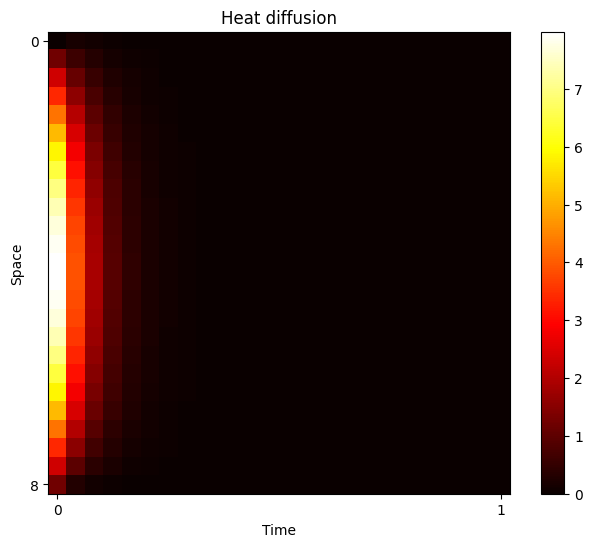

In [10]:
solver = HeatDiffusion(
    initial_condition=lambda x: 4 * x - x**2 / 2,
    diffusion_coefficient=4.0,
    space_bounds=(0, 8),
    time_bounds=(0, 1),
    Nx=25,
    Nt=25,
)
solver.solve()
solver.tabulate_solution(at_time=Array("d", [0, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75]))
solver.plot_solution()

We calculated $\alpha$ by the following formula
$$\alpha = \sigma \times \dfrac{k}{h^2}
$$
where $k$ and $h$ represent the temporal and spatial step-sizes respectively
and $\sigma$ is the diffusion coefficient, and is equal to $4$ for this problem. This choice
comes from the Forward/Backward Finite Difference Methods which arises from the need of
choosing a appropriate ratio which captures how the spatial step size changes with the
temporal step size, viz, the following:
$$
\dfrac{\Delta t}{(\Delta x)^2}
$$


For matrix inversion, we used the `TDMA` (Tridiagonal Matrix Inversion) algorithm, aka, Thomas Algorithm.
It was implemented natively as the method `thomas_algorithm` of `HeatDiffusion` solver class 
using the custom datastructures described in `datamodels` module of the `lib` package.

It is a simplified form of Gaussian elimination that can be used to solve tridiagonal systems of equations.
The matrices $A$ and $B$ that appear in `Crank-Nicolson` method are tridiagonal matrices and the `TDMA` algorithm
utilises this and yields a solution with time complexity of $\mathcal{O}(n)$ instead of the much worse $\mathcal{O}(n^3)$ of the Gaussian Elimination.

### 5. Solve the Poisson’s equation $u_{xx}+u_{yy} = xe^y$ in a $6 \times 6$ grid with boundary conditions

$$
\begin{cases}
    u(0, y) = y \\
    u(2, y) = 2 e^y
\end{cases}
\hspace{1cm}
\text{and}
\hspace{1cm}
\begin{cases}
    u(0, x) = x \\
    u(2, x) = xe
\end{cases}
$$

Space     Space     Temperature
0.00      0.00      0.00e+00  
0.10      0.00      2.40e-02  
0.20      0.00      5.28e-02  
0.30      0.00      9.22e-02  
0.40      0.00      1.50e-01  
0.50      0.00      2.38e-01  
0.60      0.00      3.73e-01  
0.70      0.00      5.83e-01  
0.80      0.00      9.10e-01  
0.90      0.00      1.42e+00  
1.00      0.00      2.21e+00  

0.00      0.10      0.00e+00  
0.10      0.10      2.65e-02  
0.20      0.10      5.84e-02  
0.30      0.10      1.02e-01  
0.40      0.10      1.66e-01  
0.50      0.10      2.63e-01  
0.60      0.10      4.12e-01  
0.70      0.10      6.44e-01  
0.80      0.10      1.01e+00  
0.90      0.10      1.57e+00  
1.00      0.10      2.44e+00  

0.00      0.20      0.00e+00  
0.10      0.20      2.93e-02  
0.20      0.20      6.45e-02  
0.30      0.20      1.13e-01  
0.40      0.20      1.83e-01  
0.50      0.20      2.90e-01  
0.60      0.20      4.56e-01  
0.70      0.20      7.12e-01  
0.80      0.20      1.11e+00  
0.90 

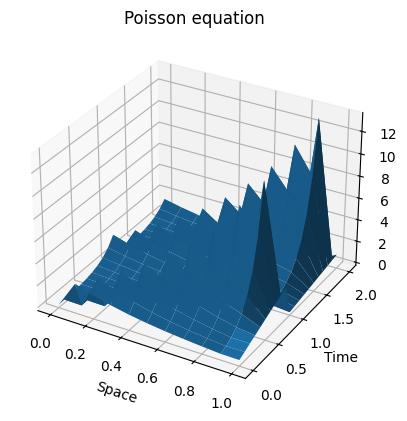

In [11]:
poisson = PoissonEquation(
    x_bounds=(0, 1),
    y_bounds=(0, 2),
    M=10,
    N=20,
)

poisson.dirichlet_boundary_conditions(
    left = lambda y: 0,
    right = lambda y: 2 * math.exp(y),
    bottom = lambda x: x,
    top = lambda x: x* math.exp(1)
)

poisson.solve()
poisson.tabulate_solution()
poisson.plot_solution()